# ML Nr 2: Playing the Whole Game

This notebook are the following members submission to the ML Nr 2 project:

**Anders Simonsen**

## Table of Contents:
* [1. Framing the problem](#first-bullet)
* [2. Get the data](#second-bullet)
* [3. Exploring the data](#third-bullet)
* [4. Preparing the data](#fourth-bullet)
* [5. Exploring different models](#fifth-bullet)
* [6. Fine tuning the model](#sixth-bullet)
* [7. Present the solution](#seventh-bullet)
* [8. Launch, monitor and maintaining the system](#eight-bullet)

# 1. Framing the problem <a class="anchor" id="first-bullet"></a>

For the project I have chosen the data set regarding house prices from the following Kaggle competition:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation

Within the Kaggle contest description the following goal has been specified for the task which I will be working towards:

**Task: "It is your job to predict the sales price of each house. For each Id in the test set, you must predict the value of the SalePrice variable."**

My solution to this task will most likely be used as a tool to help real estate agents assess the value of residential homes in the city of Ames, Iowa. Included in the data files is a training set with the sale price included so therefore this will be a supervised learning problem since I can match results with the labels we are given. Since I am also trying to predict a single value with multiple features for each house this is a univariate regression problem. Lastly, batch learning will be included in the design since there are no continous flow of data coming into the system.

Since we are trying to predict values, and as mentioned have a labelled training set, I will be measuring the models performance with the RMSE (Root-Mean-Square deviation) method where I compare the predicted value with the actual value in the labels to see how wrong the model makes its predictions. Keeping the range of error small is important so that those who uses this model can get reasonably accurate price predictions otherwise the tool will not be used.

# 2. Get the data <a class="anchor" id="second-bullet"></a>

To start off I fetch the necessary python libraries, initialize some useful variables and load the included data files into variables

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from joblib import dump

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

NB_DIR = Path.cwd()
DATA_DIR = NB_DIR/'..'/'data'

#lists the files in the folder
import os
print(os.listdir(DATA_DIR))

['data_description.txt', 'sample_submission.csv', 'submission.csv', 'test.csv', 'train.csv']


In [2]:
# Reads in the csv-files and creates a dataframe using pandas

train = pd.read_csv(DATA_DIR/'train.csv')
test = pd.read_csv(DATA_DIR/'test.csv')

## A brief look at the data 

Having a quick look at the data can help identify things we need to do with it later on in case there are any null-values present for example. Starting with the train set:

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**Wow!** That is a lot of features and some of them have null values or categorical values we need to take care of later when we prepare the data if we want to be able to load this into a model. I suspect the train set suffers from the same so lets take a look at that as well (but not too much so we don't accidentally start *snooping* on it!)

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

As suspected, the test set also has null and categorical values present in it which we have to preprocess later on.

# 3. Explore the data <a class="anchor" id="third-bullet"></a>

To not risk harming the training set with our explorations we create a copy of it saved into a new variable:

In [9]:
price_train = train.copy()

As we have seen already there are 79 features available to us but they are not necessarily all useful when it comes to predicting a house's sale price. Let's start off with setting up a correlation matrix so that we can clarify which numeric features has an impact on the sale price.

In [10]:
correlation_matrix = price_train.corr()
correlation_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Interestingly, there are not that many numeric features that has a substantial impact on the SalesPrice of a house. Not all feature names are as self-explanatory so I will add the description from the data_description.txt file included with the data:

<ul>
    <li>OverallQual - Rates the overall material and finish of the house (1-10)</li>
    <li>GrLivArea - Above grade (ground) living area square feet</li>
    <li>GarageCars - Size of garage in car capacity</li>
    <li>GarageArea - Size of garage in square feet</li>
    <li>TotalBsmtSF - Total square feet of basement area</li>
    <li>1stFlrSF - First Floor square feet</li>
    <li>FullBath - Full bathrooms above grade</li>
    <li>TotRmsAbvGrd - Total rooms above grade (does not include bathrooms)</li>
    <li>YearBuilt - Original construction date</li>
    <li>YearRemodAdd - Remodel date (same as construction date if no remodeling or additions)</li>
    <li>GarageYrBlt - Year garage was built</li>
    <li>MasVnrArea - Masonry veneer area in square feet</li>
    <li>Fireplaces - Number of fireplaces</li>
    <li>BsmtFinSF1 - Type 1 finished square feet</li>
    <li>LotFrontage - Linear feet of street connected to property</li>
    <li>WoodDeckSF - Wood deck area in square feet</li>
    <li>2ndFlrSF - Second floor square feet</li>
    <li>OpenPorchSF - Open porch area in square feet</li>
    <li>HalfBath - Half baths above grade</li>
    <li>LotArea - Lot size in square feet</li>
    <li>BsmtFullBath - Basement full bathrooms</li>
    <li>BsmtUnfSF - Unfinished square feet of basement area</li>
    <li>BedroomAbvGr - Bedrooms above grade (does NOT include basement bedrooms)</li>
    <li>ScreenPorch - Screen porch area in square feet</li>
    <li>PoolArea - Pool area in square feet</li>
    <li>MoSold - Month Sold (MM)</li>
    <li>3SsnPorch - Three season porch area in square feet</li>
    <li>BsmtFinSF2 - Type 2 finished square feet</li>
    <li>BsmtHalfBath - Basement half bathrooms</li>
    <li>MiscVal - Value of miscellaneous feature</li>
    <li>LowQualFinSF - Low quality finished square feet (all floors)</li>
    <li>YrSold - Year Sold (YYYY)</li>
    <li>OverallCond - Rates the overall condition of the house</li>
    <li>MSSubClass - Identifies the type of dwelling involved in the sale.</li>
    <li>EnclosedPorch - Enclosed porch area in square feet</li>
    <li>KitchenAbvGr - Kitchens above grade</li>
</ul>

Now I want to take a quick look at the top 4 features plotted against each other to see if there is a correlation between them we haven't picked up yet or any other new discoveries.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7A8C9BF48>,
      dtype=object)

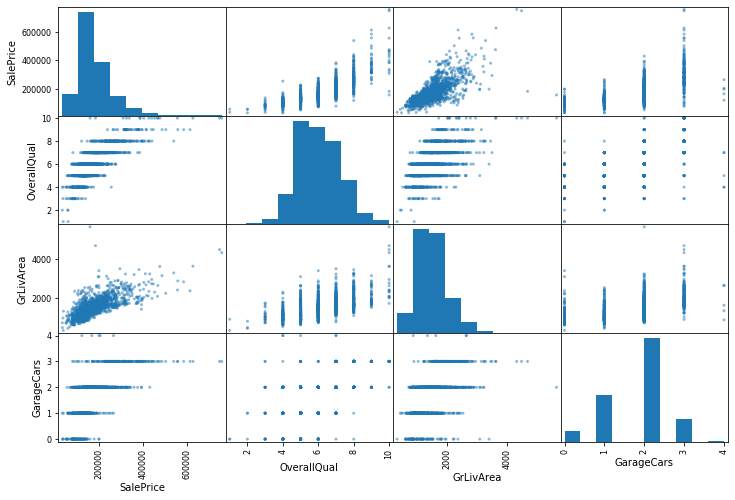

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars"]
scatter_matrix(price_train[attributes], figsize=(12,8))

There seems to be something interesting going on between "SalePrice" and "GrLivArea" regarding outliers - lets zoom in on that plot to get a better look at it.

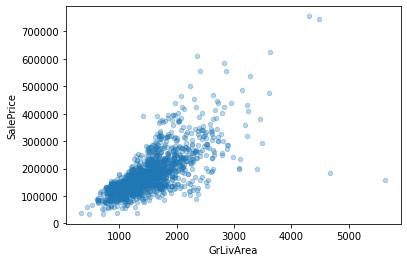

In [12]:
price_train.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.3)

There are indeed some outliers present in the GrLivArea feature. It seems like 4 houses were sold with a GrLivArea much higher than the average and 2 of them with the highest recorded SalePrice. We do not want the machine learning model to reproduce these so when we get to the next step of preparing the data we have to make sure to remove the GrLivArea entries that have a value > 4000.

With the dataset being so rich on features it would not hurt doing some more plotting of other features to see if they also suffer from outliers. I have selected the following features for inspection:

<ul><b>
    <li>LotFrontage</li>
    <li>MasVnrArea</li>
    <li>LotArea</li></b>
</ul>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7AA7BDE08>,
      dtype=object)

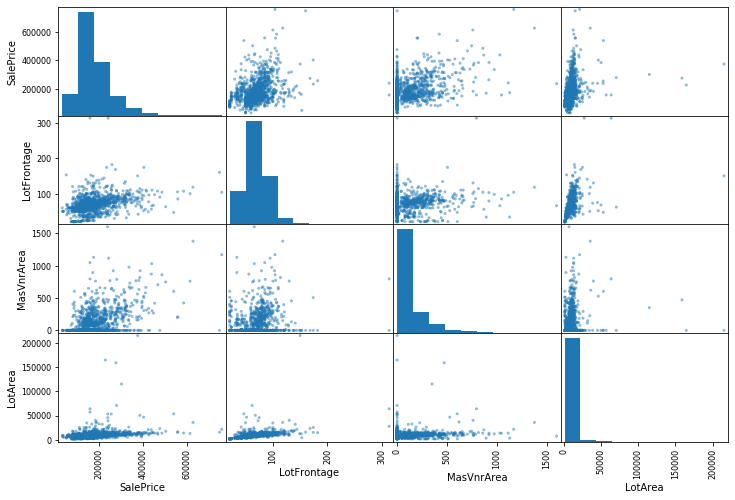

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "LotFrontage", "MasVnrArea", "LotArea"]
scatter_matrix(price_train[attributes], figsize=(12,8))

Would you look at that - every feature we selected suffers from outliers so we should make a note of removing them by taking away:

<ul>
    <li>Every LotFrontage with a value higher than 150</li>
    <li>Every MasVnrArea with a value higher than 1000</li>
    <li>Every LotArea with a value higher than 60000</li>
</ul>

This concludes my exploration for now. We managed to catch up some outliers which undoubtedly will improve the performance of our model and im sure there are other things we would have found with further investigation. However, with data exploration being the time sink it is I will cut it short so that I have enough time to implement the rest of the assignment.

# 4. Preparing the data <a class="anchor" id="fourth-bullet"></a>

Now that I have explored the data, its time to prepare it to be fed into our machine learning models in accordance with what we found out in the previous section. Before I do anything I will reset the price_train variable and later on extract the label "SalePrice" from it so that I can compare it with the models prediction using RMSE.

In [14]:
price_train = train.copy();

Make a copy of the test set as well for the same reasons

In [15]:
# Save these when needed for example in creating a submission file
train_ID = train['Id']
test_ID = test['Id']

price_train = price_train.drop("Id", axis=1)

cleaned_test = test.copy()
cleaned_test = cleaned_test.drop("Id", axis=1)

## Removing outliers

Like I mentioned in the 'Get the Data' section, there are many null values and categorical values present in the data. Starting with the null values we have a couple features that have incredibly high numbers of missing entries:

<ul><b>
    <li>Alley - (91 of 1460 entries)</li>
    <li>PoolQC - (7 of 1460 entries)</li>
    <li>Fence - (281 of 1460 entries)</li>
    <li>MiscFeature - (54 of 1460 entries)</li>
    </b></ul>
    
The number of missing entries are so high that if I were to put in a median value for the missing ones or just a 0 then I might risk losing precision with our machine learning model. Therefore, I decided to completely remove these features from both the train and test set.

In [16]:
cleaned_test = cleaned_test.drop(["Alley","PoolQC","Fence","MiscFeature"],  axis=1)

price_train = price_train.drop(["Alley","PoolQC","Fence","MiscFeature"],  axis=1)

I also mentioned there being outliers in the data for GrLivArea > 4000, LotFrontage > 150, MasVnrArea > 1000 and LotArea > 60000 - so let us get rid of that now so we do not reproduce these in the machine learning model.

In [17]:
price_train = price_train[price_train['GrLivArea']<4000]

price_train = price_train[price_train['LotFrontage']<150]

price_train = price_train[price_train['MasVnrArea']<1000]

price_train = price_train[price_train['LotArea']<60000]

## It is now safe to extract the "SalePrice" feature and remove it from price_train
price_train_labels = price_train["SalePrice"].copy()
price_train = price_train.drop("SalePrice", axis=1)

## Clean up null numerical values

There are currently some null values present in the data set we need to clean up with either a median or 0 value. If we want an exact number of how many there are we could do:

In [18]:
print(price_train.isnull().sum().sum())

1117


In [19]:
print(cleaned_test.isnull().sum().sum())

1615


Instead of going through all the numerical values one by one I will instead use a pipeline for the values that will fill in the median and standardize it for me.

### Defining the pipeline for numerics

Before we send the values into the pipeline I need to remove the categorical features from the price_train set

In [20]:
price_train_num = price_train.drop(["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope",
                                   "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
                                   "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", 
                                   "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                                   "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional",
                                   "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive",
                                   "SaleType", "SaleCondition"], axis=1)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

price_train_num_pipe = num_pipeline.fit_transform(price_train_num)

This pipeline will be used later in a combined pipeline that can handle both numerical and categorical values.

## Clean up categorical values 

### Fill in the null values

We go through all the categorical features in both the train and the test set and fill it with a value:

In [22]:
for col in ('Electrical','MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional'):
    price_train[col]=price_train[col].fillna(price_train[col].mode()[0])
    cleaned_test[col]=cleaned_test[col].fillna(cleaned_test[col].mode()[0])
    
for col in ('Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
           ):
    price_train[col]=price_train[col].fillna('None')
    cleaned_test[col]=cleaned_test[col].fillna('None')
    
for col in ('Electrical','MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional'):
    price_train[col]=price_train[col].fillna(price_train[col].mode()[0])
    cleaned_test[col]=cleaned_test[col].fillna(cleaned_test[col].mode()[0])
    
for col in ('GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea'):
    price_train[col]=price_train[col].fillna(price_train[col].mode()[0])
    cleaned_test[col]=cleaned_test[col].fillna(cleaned_test[col].mode()[0])
    
price_train['LotFrontage']=price_train['LotFrontage'].fillna(price_train['LotFrontage'].mean())
cleaned_test['LotFrontage']=cleaned_test['LotFrontage'].fillna(cleaned_test['LotFrontage'].mean())

Quick check to see if we got all the null values:

In [23]:
print(price_train.isnull().sum().sum())

0


In [24]:
print(cleaned_test.isnull().sum().sum())

0


All the categorical features should now have no null values present. With this done we can now send it into a pipeline where it will be transformed into numeric ones which is then next step.

### Defining the full pipeline for numeric and categorical values 

Now to convert the categorical values to numeric ones that can be used in our machine learning model. I will be using a OneHotEncoder and combine it with the numerical pipeline into a ColumnTransformer that can convert both numerical and categorical values at once.

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(price_train_num)
cat_attribs = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope",
               "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
               "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", 
               "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
               "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional",
               "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive",
               "SaleType", "SaleCondition"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

## To prevent different amount of features we need to concat the train and test set and fit the pipeline on it
## Not doing this will result in errors later when trying to transform another data set

train_test_set = pd.concat([price_train, cleaned_test], sort=False)

dummy_fit = full_pipeline.fit_transform(train_test_set)

price_house_prepared = full_pipeline.transform(price_train)
price_test_prepared = full_pipeline.transform(cleaned_test)

In [26]:
price_house_prepared.transpose()

<280x1176 sparse matrix of type '<class 'numpy.float64'>'
	with 88200 stored elements in Compressed Sparse Column format>

In [27]:
price_test_prepared.transpose()

<280x1459 sparse matrix of type '<class 'numpy.float64'>'
	with 109425 stored elements in Compressed Sparse Column format>

The data has now all been converted into numerics and then standarized which means its ready to be fed into a machine learning model.

# 5. Exploring different models <a class="anchor" id="fifth-bullet"></a>

The models I have selected for exploration is:

<ul>
    <li>Linear Regression</li>
    <li>Decision Trees</li>
    <li>Random Forests</li>
    <li>XGBoost (Gradient Boosting)</li>
</ul>

The Kaggle contest description mentioned specifically gradient boosting so I think there might be value in giving it a shot.

### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(price_house_prepared, price_train_labels)

price_house_predictions = lin_reg.predict(price_house_prepared)
lin_mse = mean_squared_error(price_train_labels, price_house_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

lin_scores = cross_val_score(lin_reg, price_house_prepared, price_train_labels,
                                 scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [19434.08817538 28727.46873566 21949.07805889 21641.95596165
 33137.77032736 26612.81816731 25986.7980176  21493.04151141
 21712.19317062 24444.05980183]
Mean: 24513.927192769195
Standard deviation: 3953.6195326695906


With linear regression the average error in the model prediction is 24551$. Not very optimal so lets see how other models do.

### Decision Trees 

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(price_house_prepared, price_train_labels)

price_house_predictions = tree_reg.predict(price_house_prepared)
tree_mse = mean_squared_error(price_train_labels, price_house_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

<b>Overfitted.</b> Use the cross-validation feature of K-fold:

In [30]:
scores = cross_val_score(tree_reg, price_house_prepared, price_train_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [33010.7241781  38722.56474053 30072.52799779 42215.7656252
 42601.46620766 30420.69146603 36962.61991549 33697.6287399
 32894.5077085  37314.23753789]
Mean: 35791.27341171014
Standard deviation: 4266.028838056863


This is worse than linear regression - therefore I will take decision tree off the table when it comes to picking a model.

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(price_house_prepared, price_train_labels)
price_house_predictions = forest_reg.predict(price_house_prepared)
forest_mse  = mean_squared_error(price_train_labels, price_house_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

forest_scores = cross_val_score(forest_reg, price_house_prepared, price_train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [25024.58625725 25894.47084872 20535.98238027 25009.52986851
 32200.63461233 28270.76591777 26367.21260885 23556.07487349
 21270.56033281 29705.51420017]
Mean: 25783.533190016264
Standard deviation: 3422.583919051987


Still worse than linear regression, therefore random forests are also off the table.

### XGBoost 

XGBoost has in recent times become the "state-of-the-art" machine learning algorithm to deal with structured data. Since we are in fact dealing with structured data in our task this should be a good fit to achieve a good prediction result.

In [32]:
import xgboost as xgb
from hyperopt import hp, tpe, fmin

space = {'n_estimators':hp.quniform('n_estimators', 1000, 4000, 100),
         'gamma':hp.uniform('gamma', 0.01, 0.05),
         'learning_rate':hp.uniform('learning_rate', 0.00001, 0.025),
         'max_depth':hp.quniform('max_depth', 3,7,1),
         'subsample':hp.uniform('subsample', 0.60, 0.95),
         'colsample_bytree':hp.uniform('colsample_bytree', 0.60, 0.98),
         'colsample_bylevel':hp.uniform('colsample_bylevel', 0.60, 0.98),
         'reg_lambda': hp.uniform('reg_lambda', 1, 20)
        }

def objective(params):
    params = {'n_estimators': int(params['n_estimators']),
             'gamma': params['gamma'],
             'learning_rate': params['learning_rate'],
             'max_depth': int(params['max_depth']),
             'subsample': params['subsample'],
             'colsample_bytree': params['colsample_bytree'],
             'colsample_bylevel': params['colsample_bylevel'],
             'reg_lambda': params['reg_lambda']}
    
    xb_a= xgb.XGBRegressor(**params)
    score = cross_val_score(xb_a, price_house_prepared, price_train_labels, scoring='neg_mean_squared_error', cv=5, n_jobs=-1).mean()
    return -score

I think XGBoost will be the best fit for the task, therefore im gonna take it to the next step to see how good it performs with optimized parameters.

# 6. Fine tuning the model <a class="anchor" id="sixth-bullet"></a>

### XGBoost

XGBoost has a very useful way to find the best fine tuned model and I have it run 20 evals and store the best parameters in a 'best' variable which I will use for the final fitted model.

In [33]:
best = fmin(fn= objective, space= space, max_evals=20, rstate=np.random.RandomState(1), algo=tpe.suggest)

100%|████████████████████████████████████████████████| 20/20 [01:41<00:00,  5.09s/trial, best loss: 491997262.48174286]


In [34]:
print(best)

{'colsample_bylevel': 0.6047300278120613, 'colsample_bytree': 0.962596978164243, 'gamma': 0.03555213530750408, 'learning_rate': 0.013030536439332167, 'max_depth': 3.0, 'n_estimators': 1600.0, 'reg_lambda': 10.077972736082106, 'subsample': 0.7616933868399396}


In [35]:
xb_b = xgb.XGBRegressor(random_state=0,
                        n_estimators=int(best['n_estimators']), 
                        colsample_bytree= best['colsample_bytree'],
                        gamma= best['gamma'],
                        learning_rate= best['learning_rate'],
                        max_depth= int(best['max_depth']),
                        subsample= best['subsample'],
                        colsample_bylevel= best['colsample_bylevel'],
                        reg_lambda= best['reg_lambda']
                       )

xb_b.fit(price_house_prepared, price_train_labels)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6047300278120613, colsample_bynode=1,
             colsample_bytree=0.962596978164243, gamma=0.03555213530750408,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.013030536439332167, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1600, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=10.077972736082106, scale_pos_weight=1,
             subsample=0.7616933868399396, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [36]:
xgb_scores = cross_val_score(xb_b, price_house_prepared, price_train_labels,
                                scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

Scores: [20025.49617432 23893.82803796 15106.9728897  20013.75867059
 28846.73929513 25771.22424147 21426.52020343 20371.1618666
 17648.18953449 22391.97900832]
Mean: 21549.58699220096
Standard deviation: 3742.85151253194


With this RMSE result for XGBoost I'm now confident to make the final prediction with this model and also deploy it afterwards.

In [37]:
final_prediction = xb_b.predict(price_test_prepared)

# 7. Present the solution <a class="anchor" id="seventh-bullet"></a>

Make a submission file to the Kaggle contest this task is from as a curiosity to see how well the model performs in comparison with all other recorded submissions.

In [38]:
## Uncomment this code if you wish to create a submission file
output = pd.DataFrame()
output['Id'] = test_ID
output['SalePrice'] = final_prediction
output.to_csv(NB_DIR/'..'/'data'/'submission.csv', index=False)

At the time of writing this the resulting submission file is ranked 991 of 4425. While this might show that there are better solutions out there it is still at about the top 20% results which is very satisfactory for me. Once the solution is deployed I believe the range of possible error is small enough that real estate agents can confidently use this is a tool to get an estimate of where a house's value should be priced and then make corrections if they see fit with their own work experience.

There has been a small decrease of features in the model compared to what we started with, namely:

<ul>
    <li>Alley</li>
    <li>PoolQC</li>
    <li>Fence</li>
    <li>MiscFeature</li>
</ul>

has been removed
        
These features will not be recognized by the current model since they were dropped during preproccesing but judging from the high amount of missing values they had in the data set I do not think the impact will be decisive. Other than that I would like to remark that having a little bigger data set compared to the one we were provided might have been beneficial. While features were plenty, only having 1459 records in the test set and 1460 in the train set could very well impact the model and we might have been able to reach a higher level of precision if the set was a little bigger.

Other than that there were some obvious findings with correlating features where

<ul>
    <li>OverallQual - the overall material and finish of the house</li>
    <li>GrLivArea -  Above grade (ground) living area square feet</li>
    <li>GarageCars & GarageArea - Car capacity and area of garage</li>
</ul>
        
had the biggest impact on the sale price of a house.

# 8. Launch, monitor and maintaining the system <a class="anchor" id="eight-bullet"></a>

Assuming our resulting prediction model is approved by our employer, it is now time to launch the system. Getting it ready for production we have to do some additional steps like writing documentation, tests and polishing the code and more. After that is done we can deploy the model to our production enviroment.

One way of doing this is to save the trained model by using joblib for example, which includes all the preprocessing and prediction pipeline, then load the trained model within our production enviroment and use it to make predictions by using the function call predict().

### Export our trained model 

In [39]:
## Uncomment this if you wish to make a exported model file
MODEL_DIR = NB_DIR/'..'/'models'

dump(xb_b, MODEL_DIR/'price_house_model.joblib', compress=6)

['C:\\Users\\Anders\\OneDrive - Høgskulen på Vestlandet\\DAT158\\Machine Learning\\ML2\\notebooks\\..\\models\\price_house_model.joblib']

### Export the final pipeline

In [40]:
dump(full_pipeline, MODEL_DIR/'pipeline.joblib')

['C:\\Users\\Anders\\OneDrive - Høgskulen på Vestlandet\\DAT158\\Machine Learning\\ML2\\notebooks\\..\\models\\pipeline.joblib']

With the model and pipeline exported, this marks the end of the notebook. Rest of the work will take part in the other files uploaded in the repository if you wish to follow along the deployment. Thank you for reading